In [156]:
import pandas as pd

weather = pd.read_csv("/content/4089874.csv", index_col="DATE", parse_dates=True)


In [157]:
weather.apply(pd.isnull).sum()/weather.shape[0]

,0
STATION,0.000000
NAME,0.000000
PRCP,0.516333
TAVG,0.000000
TMAX,0.202564
TMIN,0.348496


In [158]:
core_weather = weather[["PRCP", "TMAX", "TMIN"]].copy()
core_weather.columns = ["precip", "temp_max", "temp_min"]



In [159]:
core_weather.apply(pd.isnull).sum()

,0
precip,8014
temp_max,3144
temp_min,5409


In [160]:
core_weather.loc["2013-12-15",:]

,2013-12-15
precip,0.0
temp_max,NaN
temp_min,67.0


In [161]:
core_weather["precip"].value_counts() / core_weather.shape[0]

,count
precip,
0.00,0.466529
0.02,0.002835
0.01,0.002835
0.06,0.000838
0.04,0.000709
...,...
1.64,0.000064
1.46,0.000064
2.20,0.000064


In [162]:
core_weather["precip"] = core_weather["precip"].fillna(0)

In [163]:
core_weather.apply(pd.isnull).sum()

,0
precip,0
temp_max,3144
temp_min,5409


In [164]:
core_weather[pd.isnull(core_weather["temp_min"])]

,precip,temp_max,temp_min
DATE,,,
1983-01-07,0.0,74.0,NaN
1983-01-09,0.0,81.0,NaN
1983-01-16,0.0,73.0,NaN
1983-01-20,0.0,NaN,NaN
1983-01-21,0.0,66.0,NaN
...,...,...,...
2025-07-19,0.0,111.0,NaN
2025-07-23,0.0,103.0,NaN
2025-07-27,0.0,113.0,NaN


In [165]:
core_weather.loc["2011-12-18":"2011-12-28"]

,precip,temp_max,temp_min
DATE,,,
2011-12-18,0.0,NaN,61.0
2011-12-19,0.0,79.0,62.0
2011-12-20,0.0,81.0,64.0
2011-12-21,0.0,80.0,62.0
2011-12-22,0.0,NaN,58.0
2011-12-23,0.0,78.0,58.0
2011-12-24,0.0,75.0,57.0
2011-12-25,0.0,75.0,60.0
2011-12-26,0.0,75.0,58.0


In [166]:
core_weather = core_weather.fillna(method="ffill")

/tmp/ipython-input-3127936549.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  core_weather = core_weather.fillna(method="ffill")


In [167]:
core_weather.apply(pd.isnull).sum()

,0
precip,0
temp_max,0
temp_min,0


In [168]:
core_weather.apply(lambda x: (x == 9999).sum())

,0
precip,0
temp_max,0
temp_min,0


In [169]:
core_weather.dtypes

,0
precip,float64
temp_max,float64
temp_min,float64


In [170]:
core_weather.index

DatetimeIndex(['1983-01-01', '1983-01-02', '1983-01-03', '1983-01-04',
               '1983-01-05', '1983-01-06', '1983-01-07', '1983-01-08',
               '1983-01-09', '1983-01-10',
               ...
               '2025-07-21', '2025-07-22', '2025-07-23', '2025-07-24',
               '2025-07-25', '2025-07-26', '2025-07-27', '2025-07-28',
               '2025-07-29', '2025-07-30'],
              dtype='datetime64[ns]', name='DATE', length=15521, freq=None)

In [171]:
core_weather.index = pd.to_datetime(core_weather.index)

In [172]:
core_weather.index

DatetimeIndex(['1983-01-01', '1983-01-02', '1983-01-03', '1983-01-04',
               '1983-01-05', '1983-01-06', '1983-01-07', '1983-01-08',
               '1983-01-09', '1983-01-10',
               ...
               '2025-07-21', '2025-07-22', '2025-07-23', '2025-07-24',
               '2025-07-25', '2025-07-26', '2025-07-27', '2025-07-28',
               '2025-07-29', '2025-07-30'],
              dtype='datetime64[ns]', name='DATE', length=15521, freq=None)

In [173]:
core_weather.index.year

Index([1983, 1983, 1983, 1983, 1983, 1983, 1983, 1983, 1983, 1983,
       ...
       2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025],
      dtype='int32', name='DATE', length=15521)

<Axes: xlabel='DATE'>

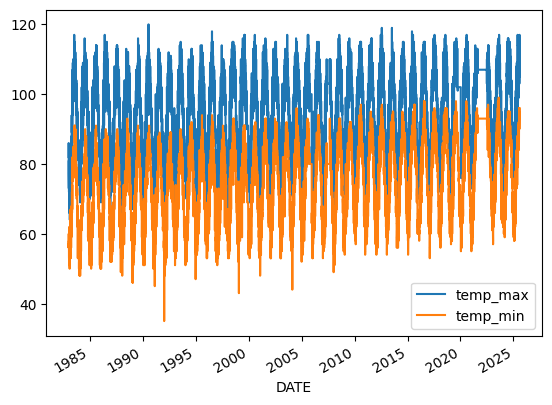

In [174]:
core_weather[["temp_max", "temp_min"]].plot()

In [175]:
core_weather.index.year.value_counts().sort_index()

,count
DATE,
1983,365
1984,366
1985,365
1986,365
1987,365
1988,366
1989,365
1990,365
1991,361


<Axes: xlabel='DATE'>

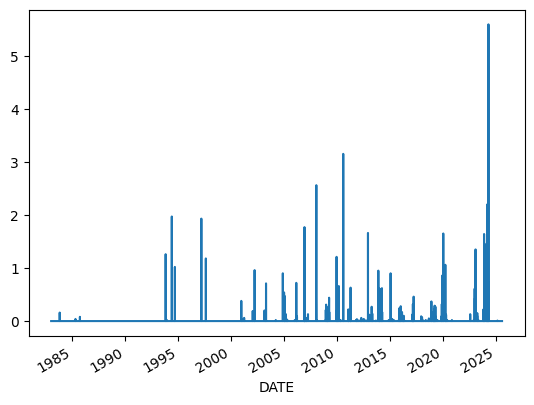

In [176]:
core_weather["precip"].plot()

<Axes: xlabel='DATE'>

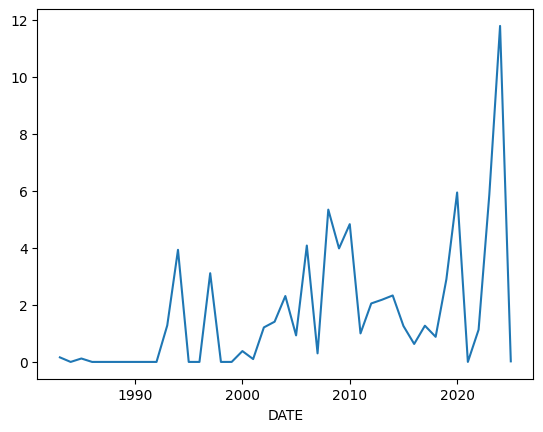

In [177]:
core_weather.groupby(core_weather.index.year).apply(lambda x: x["precip"].sum()).plot()

In [178]:
core_weather["target"] = core_weather.shift(-1)["temp_max"]

In [179]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1983-01-01,0.0,82.0,57.0,86.0
1983-01-02,0.0,86.0,56.0,77.0
1983-01-03,0.0,77.0,58.0,74.0
1983-01-04,0.0,74.0,60.0,74.0
1983-01-05,0.0,74.0,58.0,74.0
...,...,...,...,...
2025-07-26,0.0,113.0,93.0,113.0
2025-07-27,0.0,113.0,93.0,116.0
2025-07-28,0.0,116.0,96.0,117.0


In [180]:
core_weather = core_weather.iloc[:-1,:].copy()

In [181]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1983-01-01,0.0,82.0,57.0,86.0
1983-01-02,0.0,86.0,56.0,77.0
1983-01-03,0.0,77.0,58.0,74.0
1983-01-04,0.0,74.0,60.0,74.0
1983-01-05,0.0,74.0,58.0,74.0
...,...,...,...,...
2025-07-25,0.0,108.0,93.0,113.0
2025-07-26,0.0,113.0,93.0,113.0
2025-07-27,0.0,113.0,93.0,116.0


In [182]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [183]:
predictors = ["precip", "temp_max", "temp_min"]

In [184]:
train = core_weather.loc[:"2020-12-31"]
test = core_weather.loc["2021-01-01":]

In [185]:
train

,precip,temp_max,temp_min,target
DATE,,,,
1983-01-01,0.0,82.0,57.0,86.0
1983-01-02,0.0,86.0,56.0,77.0
1983-01-03,0.0,77.0,58.0,74.0
1983-01-04,0.0,74.0,60.0,74.0
1983-01-05,0.0,74.0,58.0,74.0
...,...,...,...,...
2020-12-27,0.0,78.0,62.0,78.0
2020-12-28,0.0,78.0,63.0,77.0
2020-12-29,0.0,77.0,60.0,81.0


In [186]:
test

,precip,temp_max,temp_min,target
DATE,,,,
2021-01-01,0.0,80.0,64.0,79.0
2021-01-02,0.0,79.0,62.0,77.0
2021-01-03,0.0,77.0,62.0,77.0
2021-01-04,0.0,77.0,62.0,78.0
2021-01-05,0.0,78.0,57.0,76.0
...,...,...,...,...
2025-07-25,0.0,108.0,93.0,113.0
2025-07-26,0.0,113.0,93.0,113.0
2025-07-27,0.0,113.0,93.0,116.0


In [187]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [188]:
predictions = reg.predict(test[predictors])

In [189]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test["target"], predictions)

12.616598622181227

In [190]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [191]:
combined

,actual,predictions
DATE,,
2021-01-01,79.0,80.789455
2021-01-02,77.0,79.669193
2021-01-03,77.0,78.013213
2021-01-04,78.0,78.013213
2021-01-05,76.0,78.110523
...,...,...
2025-07-25,113.0,108.211113
2025-07-26,113.0,112.351062
2025-07-27,116.0,112.351062


<Axes: xlabel='DATE'>

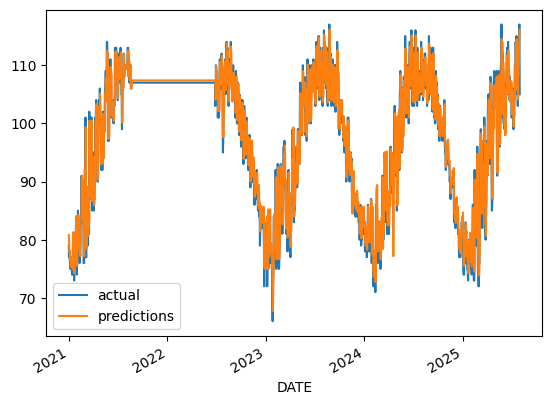

In [192]:
combined.plot()

In [193]:
reg.coef_

array([-1.07305333,  0.82798984,  0.14613596])

In [194]:
core_weather["monthly_avg"] = (
    core_weather["temp_max"]
    .groupby(core_weather.index.month)
    .transform(lambda x: x.expanding().mean())
)

core_weather["day_of_year_avg"] = (
    core_weather["temp_max"]
    .groupby(core_weather.index.dayofyear)
    .transform(lambda x: x.expanding().mean())
)

In [195]:
core_weather = core_weather.iloc[30:,:].copy()

In [196]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:"2020-12-31"]
    test = core_weather.loc["2021-01-01":]

    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])

    error = mean_squared_error(test["target"], predictions)

    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [197]:
core_weather["max_min"] = core_weather["temp_max"] - core_weather["temp_min"]
predictors = ["precip", "temp_max", "temp_min", "max_min"]
error, combined = create_predictions(predictors, core_weather, reg)
error

12.616935978909575

<Axes: xlabel='DATE'>

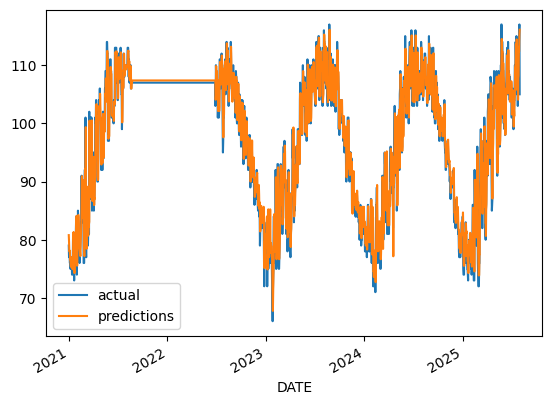

In [198]:
combined.plot()

In [199]:
core_weather["monthly_avg"] = (
    core_weather["temp_max"]
    .groupby(core_weather.index.month)
    .transform(lambda x: x.expanding().mean())
)

core_weather["day_of_year_avg"] = (
    core_weather["temp_max"]
    .groupby(core_weather.index.dayofyear)
    .transform(lambda x: x.expanding().mean())
)

In [200]:
error, combined = create_predictions(predictors + ["monthly_avg", "day_of_year_avg"], core_weather, reg)
error

17.077157105163995

In [201]:
reg.coef_

array([-1.05268672,  0.46146661,  0.22694935,  0.23451725,  0.13004361,
        0.18010645])

In [202]:
core_weather.corr()["target"]

,target
precip,-0.049620
temp_max,0.946284
temp_min,0.875286
target,1.000000
monthly_avg,0.875740
day_of_year_avg,0.890326
max_min,0.330256


In [203]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [204]:
combined.sort_values("diff", ascending=False).head(10)

,actual,predictions,diff
DATE,,,
2021-03-18,102.0,82.145219,19.854781
2025-02-12,92.0,74.851227,17.148773
2021-03-05,79.0,95.546172,16.546172
2023-02-06,92.0,77.459655,14.540345
2024-04-30,85.0,99.350519,14.350519
2025-04-16,90.0,102.754584,12.754584
2025-02-22,96.0,83.593894,12.406106
2021-05-26,97.0,109.057627,12.057627
2025-03-23,81.0,92.983387,11.983387
